#### MODULE 4 BUSINESS ANALYTIC MODEL

CHURN PREDICTION MODEL FOR NIJA READS ONLINE BOOKSHOP

Data Modeling Steps to include:
#### Data Loading 
(already cleaned data set for modeling)
#### Data Splitting
Splitting the dataset into a training and a testing dataset.
#### Data model Method/Techniques selection and training, 
# Model Evaluation 
selection of different metrics to assess model performance score and effectiveness 


The dataset contains various features of an Online Bookstore transactions database, used to run an Analysis to identify customers who are churning proactively.

 CustomerID
 Age
 Gender
 Tenure
 Usage Frequency
 Support Calls
 Payment Delay
 Subscription Type
 Contract Length
 Total Spend
 Last Interaction
 Churn

#### Data Loading
#### Importing All relevant libraries 

In [1]:
# All relevant libraries for the model Development, such as modeling algorithms and techniques to be used for:
# Data loading
# Data splitting function libraries to split data into training and testing sets,
# Machine learning model selection, fitting, and scaling data model
# Model evaluation using different metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler ,StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import VotingClassifier
from sklearn import metrics
import warnings 

warnings.filterwarnings("ignore")


In [2]:
# Loading the cleaned dataset prepared for the modeling 
df = pd.read_csv('Readydataset')

In [3]:
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,1.0,39.0,14.0,5.0,18.0,0.0,0.0,932.00,17.0,1.0
1,3.0,65.0,1.0,49.0,1.0,10.0,8.0,2.0,2.0,557.00,6.0,1.0
2,4.0,55.0,1.0,14.0,4.0,6.0,18.0,2.0,1.0,185.00,3.0,1.0
3,5.0,58.0,0.0,38.0,21.0,7.0,7.0,0.0,2.0,396.00,29.0,1.0
4,6.0,23.0,0.0,32.0,20.0,5.0,8.0,2.0,2.0,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,0.0,54.0,15.0,1.0,3.0,1.0,0.0,716.38,8.0,0.0
440829,449996.0,25.0,1.0,8.0,13.0,1.0,20.0,1.0,0.0,745.38,2.0,0.0
440830,449997.0,26.0,0.0,35.0,27.0,1.0,5.0,0.0,1.0,977.31,9.0,0.0
440831,449998.0,28.0,0.0,55.0,14.0,2.0,0.0,0.0,1.0,602.55,2.0,0.0


In [4]:
df.shape

(440833, 12)

In [5]:
df.head

<bound method NDFrame.head of         CustomerID   Age  Gender  Tenure  Usage Frequency  Support Calls  \
0              2.0  30.0     1.0    39.0             14.0            5.0   
1              3.0  65.0     1.0    49.0              1.0           10.0   
2              4.0  55.0     1.0    14.0              4.0            6.0   
3              5.0  58.0     0.0    38.0             21.0            7.0   
4              6.0  23.0     0.0    32.0             20.0            5.0   
...            ...   ...     ...     ...              ...            ...   
440828    449995.0  42.0     0.0    54.0             15.0            1.0   
440829    449996.0  25.0     1.0     8.0             13.0            1.0   
440830    449997.0  26.0     0.0    35.0             27.0            1.0   
440831    449998.0  28.0     0.0    55.0             14.0            2.0   
440832    449999.0  31.0     0.0    48.0             20.0            1.0   

        Payment Delay  Subscription Type  Contract Length

In [6]:
df.tail

<bound method NDFrame.tail of         CustomerID   Age  Gender  Tenure  Usage Frequency  Support Calls  \
0              2.0  30.0     1.0    39.0             14.0            5.0   
1              3.0  65.0     1.0    49.0              1.0           10.0   
2              4.0  55.0     1.0    14.0              4.0            6.0   
3              5.0  58.0     0.0    38.0             21.0            7.0   
4              6.0  23.0     0.0    32.0             20.0            5.0   
...            ...   ...     ...     ...              ...            ...   
440828    449995.0  42.0     0.0    54.0             15.0            1.0   
440829    449996.0  25.0     1.0     8.0             13.0            1.0   
440830    449997.0  26.0     0.0    35.0             27.0            1.0   
440831    449998.0  28.0     0.0    55.0             14.0            2.0   
440832    449999.0  31.0     0.0    48.0             20.0            1.0   

        Payment Delay  Subscription Type  Contract Length

In [7]:
# showing statistical description of the dataset

df.describe

<bound method NDFrame.describe of         CustomerID   Age  Gender  Tenure  Usage Frequency  Support Calls  \
0              2.0  30.0     1.0    39.0             14.0            5.0   
1              3.0  65.0     1.0    49.0              1.0           10.0   
2              4.0  55.0     1.0    14.0              4.0            6.0   
3              5.0  58.0     0.0    38.0             21.0            7.0   
4              6.0  23.0     0.0    32.0             20.0            5.0   
...            ...   ...     ...     ...              ...            ...   
440828    449995.0  42.0     0.0    54.0             15.0            1.0   
440829    449996.0  25.0     1.0     8.0             13.0            1.0   
440830    449997.0  26.0     0.0    35.0             27.0            1.0   
440831    449998.0  28.0     0.0    55.0             14.0            2.0   
440832    449999.0  31.0     0.0    48.0             20.0            1.0   

        Payment Delay  Subscription Type  Contract Le

In [8]:
# Performing dataset splitting into train and test datasets
X = df.drop(['Churn'],axis=1)
Y = df['Churn']


In [9]:
df.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [10]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.2, shuffle=True ,random_state=55)

In [11]:
X_train = X_train.dropna(axis=0)
X_test = X_test.dropna(axis=0)
Y_train = Y_train.dropna(axis=0)
Y_test = Y_test.dropna(axis=0)

In [12]:
X_train.shape
X_test.shape

(352666, 11)

In [13]:
Y_train.shape
Y_test.shape

(352666,)

In [14]:
Y_train.value_counts

<bound method IndexOpsMixin.value_counts of 7967      1.0
299430    0.0
43905     1.0
288256    0.0
31402     1.0
         ... 
409469    0.0
82888     1.0
422183    0.0
4762      1.0
389581    0.0
Name: Churn, Length: 88166, dtype: float64>

In [15]:
Y_test.value_counts

<bound method IndexOpsMixin.value_counts of 60026     1.0
54000     1.0
308875    0.0
209303    1.0
340982    0.0
         ... 
118028    1.0
163039    1.0
199162    1.0
56859     1.0
423139    0.0
Name: Churn, Length: 352666, dtype: float64>

In [16]:
# Y_train.value_counts

 #### Building Data Model usining 4 diffrent Selection methods for Prediction and Evaluation to decide which model best solve the churn problem
1. Logistic Regression
2. K Nearest Neighbour classifier
3. Random Forest
4. Decision Treee classifier


In [17]:
# Model No 1 Using LogisticReggression
model = LogisticRegression(max_iter=1000 ,random_state=42)
model.fit(X_train ,Y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [18]:
#Model Prediction and evaluation
Y_pred = model.predict(X_test)
report = classification_report(Y_test,Y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96    152580
         1.0       0.97      0.96      0.97    200086

    accuracy                           0.96    352666
   macro avg       0.96      0.96      0.96    352666
weighted avg       0.96      0.96      0.96    352666



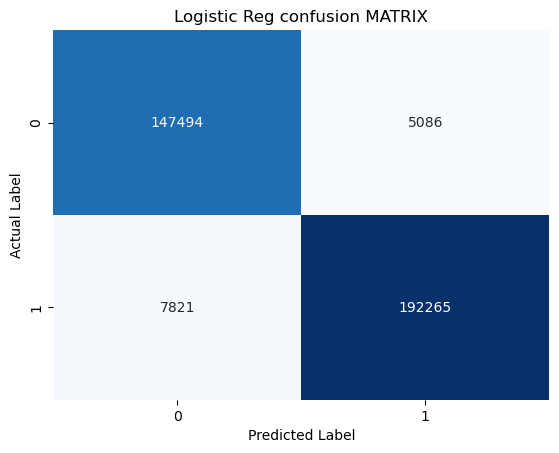

In [19]:
conf_matrix1 = confusion_matrix(Y_test ,Y_pred)

sns.heatmap(conf_matrix1 ,annot=True ,fmt='d' ,cmap='Blues' ,cbar=False ,xticklabels =[0,1] ,yticklabels =[0,1])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Logistic Reg confusion MATRIX')
plt.show()

In [20]:
# Model No 2 K Nearest Neighbour method
# Assumption K = 3
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

In [21]:
knn.fit(X_train ,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [22]:
Y_pred_knn = knn.predict(X_test)

In [23]:
accuracy_score(Y_test ,Y_pred_knn)
print(accuracy_score(Y_test ,Y_pred_knn))

0.9901124576795041


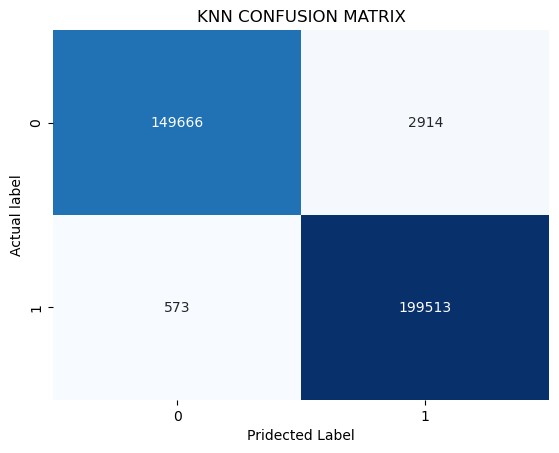

In [24]:
conf_matrix3 = confusion_matrix(Y_test ,Y_pred_knn)

sns.heatmap(conf_matrix3 , annot = True ,fmt='d' ,cmap = 'Blues',cbar = False ,xticklabels =[0,1] ,yticklabels = [0,1])
plt.xlabel('Pridected Label')
plt.ylabel('Actual label')
plt.title('KNN CONFUSION MATRIX')
plt.show()

In [25]:
# Model No 3
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = 1,
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, Y_train)

RandomForestClassifier(max_features=1, max_leaf_nodes=30, n_estimators=500,
                       n_jobs=-1, oob_score=True, random_state=50)

In [26]:
# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(Y_test, prediction_test))

0.9923667152489891


In [27]:
print(classification_report(Y_test, prediction_test))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99    152580
         1.0       0.99      1.00      0.99    200086

    accuracy                           0.99    352666
   macro avg       0.99      0.99      0.99    352666
weighted avg       0.99      0.99      0.99    352666



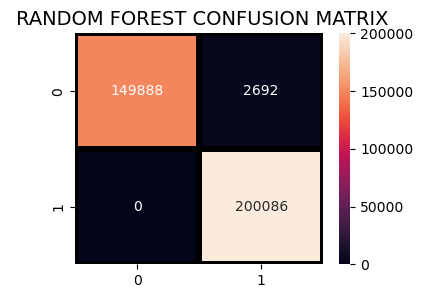

In [28]:
#conf_matrix4 = confusion_matrix(Y_test ,Y_pred_knn)


plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(Y_test, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

#sns.heatmap(conf_matrix4 , annot = True ,fmt='d' ,cmap = 'Blues',cbar = False ,xticklabels =[0,1] ,yticklabels = [0,1])
#plt.xlabel('Pridected Label')
#plt.ylabel('True label')
#plt.title('RandomForestClassification CONFUSION MATRIX')
#plt.show()

In [29]:
# Model 4 DecissionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,Y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,Y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.9993931935599122


Knn classifier and decision tree techniques show similar performance scores and accuracy, and Decission tree would be considered as a choice model for deployment

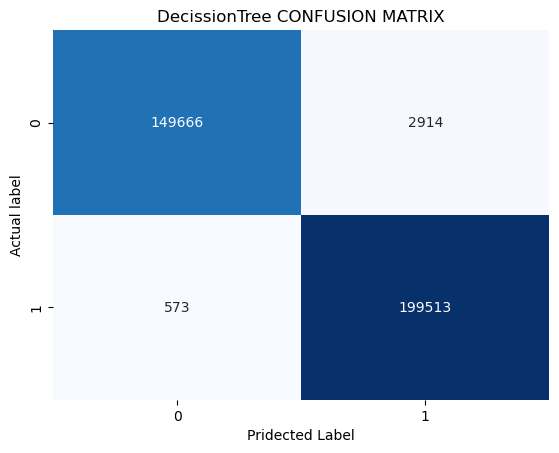

In [30]:
conf_matrix4 = confusion_matrix(Y_test ,Y_pred_knn)

sns.heatmap(conf_matrix4 , annot = True ,fmt='d' ,cmap = 'Blues',cbar = False ,xticklabels =[0,1] ,yticklabels = [0,1])
plt.xlabel('Pridected Label')
plt.ylabel('Actual label')
plt.title('DecissionTree CONFUSION MATRIX')
plt.show()

In [31]:
# Final Voting Score
clf1 = DecisionTreeClassifier()
clf2 = LogisticRegression()
clf3 = RandomForestClassifier()
clf4 = KNeighborsClassifier()
#clf5 = SVC_model2()
#eclf1 = VotingClassifier(estimators=[('dt', clf1), ('lr', clf2), ('rdf', clf3),('Knn',clf4)], voting='soft')
#eclf1.fit(X_train, Y_train)
#predictions = eclf1.predict(X_test)
#print("Final Accuracy Score ")
#print(accuracy_score(Y_test, predictions))

#### Knn classifier and decision tree techniques show similar performance scores and accuracy, and would be considered as a choice model for deployment

In [33]:
# with open(dt_model, 'wb') as file:
#     pickle.dump(dt_model, file)
# print(f"Model saved as {model_dt_model}")

# # Save the scaler (if you have one)
# with open(scaler_filename, 'wb') as file:
#     pickle.dump(scaler, file)
# print(f"Scaler saved as {scaler_filename}")

In [34]:
import pickle
with open("classer.pkl", 'wb') as fileForModal:
    pickle.dump(dt_model, fileForModal)
print(f"Model saved as fdhjkl")


Model saved as fdhjkl


In [ ]:
# import streamlit as st
# import pandas as pd
# import joblib
# import os

# # --- Load the trained model pipeline ---
# # Ensure the model file is in the same directory or provide the correct path
# MODEL_PATH = 'churn_prediction_pipeline.joblib'

# if not os.path.exists(MODEL_PATH):
#     st.error(f"Error: Model file '{MODEL_PATH}' not found. Please run 'train_model.py' first.")
#     st.stop()

# try:
#     model_pipeline = joblib.load(MODEL_PATH)
# except Exception as e:
#     st.error(f"Error loading the model pipeline: {e}")
#     st.stop()

# st.title("📞 Customer Churn Prediction for Online Bookstore")
# st.markdown("---")

# st.markdown("""
#     This application predicts whether a customer is likely to churn based on their
#     demographic, usage, and subscription details.
#     Fill in the customer details below to get a prediction.
# """)

# # --- Input Fields for Customer Data ---
# st.header("Customer Details")

# col1, col2 = st.columns(2)

# with col1:
#     age = st.slider("Age", min_value=18, max_value=80, value=30, step=1)
#     gender = st.selectbox("Gender", ['Male', 'Female', 'Other'])
#     tenure = st.slider("Tenure (Months)", min_value=1, max_value=72, value=12, step=1)
#     usage_frequency = st.slider("Usage Frequency (Times/Month)", min_value=0, max_value=50, value=15, step=1)

# with col2:
#     support_calls = st.slider("Support Calls (Last 6 Months)", min_value=0, max_value=20, value=2, step=1)
#     payment_delay = st.slider("Payment Delay (Days in Last Month)", min_value=0, max_value=60, value=0, step=1)
#     subscription_type = st.selectbox("Subscription Type", ['Basic', 'Premium', 'VIP'])
#     contract_length = st.selectbox("Contract Length", ['Monthly', 'Annually', 'Bi-Annually'])

# # --- Prediction Button ---
# st.markdown("---")
# if st.button("Predict Churn"):
#     # Create a DataFrame from user input
#     input_data = pd.DataFrame([[
#         age, gender, tenure, usage_frequency,
#         support_calls, payment_delay, subscription_type, contract_length
#     ]], columns=[
#         'Age', 'Gender', 'Tenure', 'Usage Frequency',
#         'Support Calls', 'Payment Delay', 'Subscription Type', 'Contract Length'
#     ])

#     # Make prediction using the loaded model pipeline
#     # The pipeline handles both preprocessing and prediction
#     churn_probability = model_pipeline.predict_proba(input_data)[:, 1][0]
#     churn_prediction = model_pipeline.predict(input_data)[0]

#     st.subheader("Prediction Result:")
#     if churn_prediction == 1:
#         st.error(f"⚠️ **This customer is LIKELY TO CHURN.**")
#     else:
#         st.success(f"✅ **This customer is UNLIKELY TO CHURN.**")

#     st.markdown(f"**Churn Probability:** `{churn_probability:.2%}`")
#     st.markdown("---")
#     st.info("""
#         * **Likely to Churn:** A higher probability (closer to 100%) suggests a strong risk.
#         * **Unlikely to Churn:** A lower probability (closer to 0%) suggests low risk.
#         * *Note: This is a simulated model for demonstration purposes. Real-world models require extensive data and rigorous validation.*
#     """)

In [ ]:
# import streamlit as st
# import pickle
# import numpy as np

# with open("classer.pkl", "rb") as model_file:
#     model = pickle.load(model_file)

# st.title("📞 Customer Churn Prediction for Online Bookstore")
# st.markdown("---")

# st.markdown("""
#     This application predicts whether a customer is likely to churn based on their
#     demographic, usage, and subscription details.
#     Fill in the customer details below to get a prediction.
# """)

# # --- Input Fields for Customer Data ---
# st.header("Customer Details")
# col1, col2 = st.columns(2)

# with col1:
#     age = st.slider("Age", min_value=18, max_value=80, value=30, step=1)
#     gender = st.selectbox("Gender", ['Male', 'Female', 'Other'])
#     tenure = st.slider("Tenure (Months)", min_value=1, max_value=72, value=12, step=1)
#     usage_frequency = st.slider("Usage Frequency (Times/Month)", min_value=0, max_value=50, value=15, step=1)

# with col2:
#     support_calls = st.slider("Support Calls (Last 6 Months)", min_value=0, max_value=20, value=2, step=1)
#     payment_delay = st.slider("Payment Delay (Days in Last Month)", min_value=0, max_value=60, value=0, step=1)
#     subscription_type = st.selectbox("Subscription Type", ['Basic', 'Premium', 'VIP'])
#     contract_length = st.selectbox("Contract Length", ['Monthly', 'Annually', 'Bi-Annually'])

# # --- Prediction Button ---
# st.markdown("---")

# if st.button("Predict Churn"):
#     # Create a DataFrame from user input
#     input_data = pd.DataFrame([[
#         age, gender, tenure, usage_frequency,
#         support_calls, payment_delay, subscription_type, contract_length
#     ]], columns=[
#         'Age', 'Gender', 'Tenure', 'Usage Frequency',
#         'Support Calls', 'Payment Delay', 'Subscription Type', 'Contract Length'
#     ])
#     prediction = model.predict(input_data)[0]
    
    
#     st.subheader("Prediction Result:")
#     if churn_prediction == 1:
#         st.error(f"⚠️ **This customer is LIKELY TO CHURN.**")
#     else:
#         st.success(f"✅ **This customer is UNLIKELY TO CHURN.**")

#     st.markdown(f"**Churn Probability:** `{churn_probability:.2%}`")
#     st.markdown("---")
#     st.info("""
#         * **Likely to Churn:** A higher probability (closer to 100%) suggests a strong risk.
#         * **Unlikely to Churn:** A lower probability (closer to 0%) suggests low risk.
#         * *Note: This is a simulated model for demonstration purposes. Real-world models require extensive data and rigorous validation.*
#     """)

In [ ]:
pip install streamlit

In [ ]:
!streamlit run app.py